# Deteção de Fraudes em Pagamentos Online

## Sobre o dataset:

- **step:** representa a unidade de tempo que 1 step, corresponde a 1 hora; 

- **type:** tipo de transação online; 
- **amount:** a quantia da transação; 
- **nameOrig:** cliente que iniciou a transação; 
- **oldbalanceOrg:** balanço antes da transação; 
- **newbalanceOrig:** balaço depois da transação; 
- **nameDest:** recebedor da transação; 
- **oldbalanceDest:** balanço inicial do recebedor antes da transação; 
- **newbalanceDest:** novo balanço do receber depois da transação; the new balance of recipient after the transaction
- **isFraud:** se teve fraude ou não (NOSSA TARGET) 0 = NÃO TEVE FRAUDE | 1 = TEVE FRAUDE

## Bibliotecas e Imports

In [7]:
# Bibliotecas para dados
import pandas as pd
import numpy as np

# Visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
plt.style.use("ggplot")

# Libs

from sklearn.ensemble import RandomForestClassifier
from scipy.stats import binom
from IPython.display         import Image
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

### Carregar os Dados

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
df = df.drop(columns=['isFlaggedFraud'])

## Descrição dos Dados

In [4]:
# Verificandos as colunas do dataset
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [5]:
# Verificando as dimensões
print('Numeros de linhas: {}'.format(df.shape[0]))
print('Numeros de colunas: {}'.format(df.shape[1]))

Numeros de linhas: 6362620
Numeros de colunas: 10


### Tipos dos Dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [42]:
# Fazendo a conversão de object para int
df['type'] = df['type'].map({'CASH_OUT': 1, 'PAYMENT': 2,
                            'CASH_IN': 3, 'TRANSFER': 4,
                            'DEBIT': 5})

In [8]:
# Verificando as alterações
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


### Quantidade de transações por meio de pagamentos

In [9]:
# Verificando a partir do total
df.type.value_counts()

1    2237500
2    2151495
3    1399284
4     532909
5      41432
Name: type, dtype: int64

In [10]:
# Agora vendo a porcentagem
df.type.value_counts(normalize=True)

1    0.351663
2    0.338146
3    0.219923
4    0.083756
5    0.006512
Name: type, dtype: float64

In [11]:
# Plotando num gráfico de barras
type = df.type.value_counts(normalize=True)
transacoes = type.index
quantidade = type.values

<BarContainer object of 5 artists>

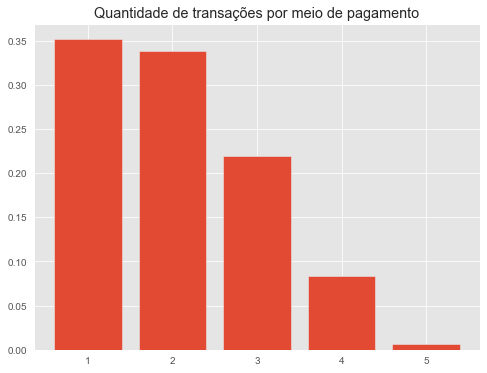

In [12]:
plt.figure(figsize = (8,6))
plt.title('Quantidade de transações por meio de pagamento')
plt.bar(transacoes, quantidade)

### Verificando o balanceamento do dataset

In [13]:
# Contando os valores
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

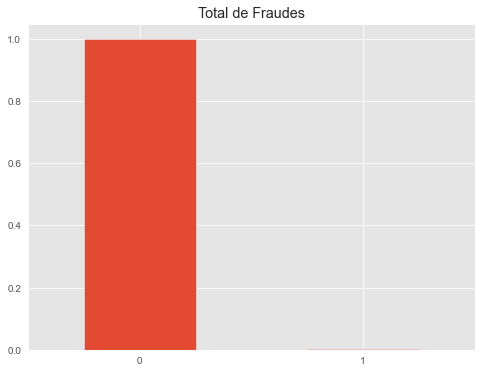

In [14]:
# Plotando o total por porcentagem
plt.figure(figsize = (8,6))
df.isFraud.value_counts(normalize=True).plot(kind='bar')
plt.title('Total de Fraudes')
plt.xticks(rotation=0)
plt.show()

Podemos ver que os nossos dados estão completamente desbalanceados.

### Relacionamento entre as variáveis

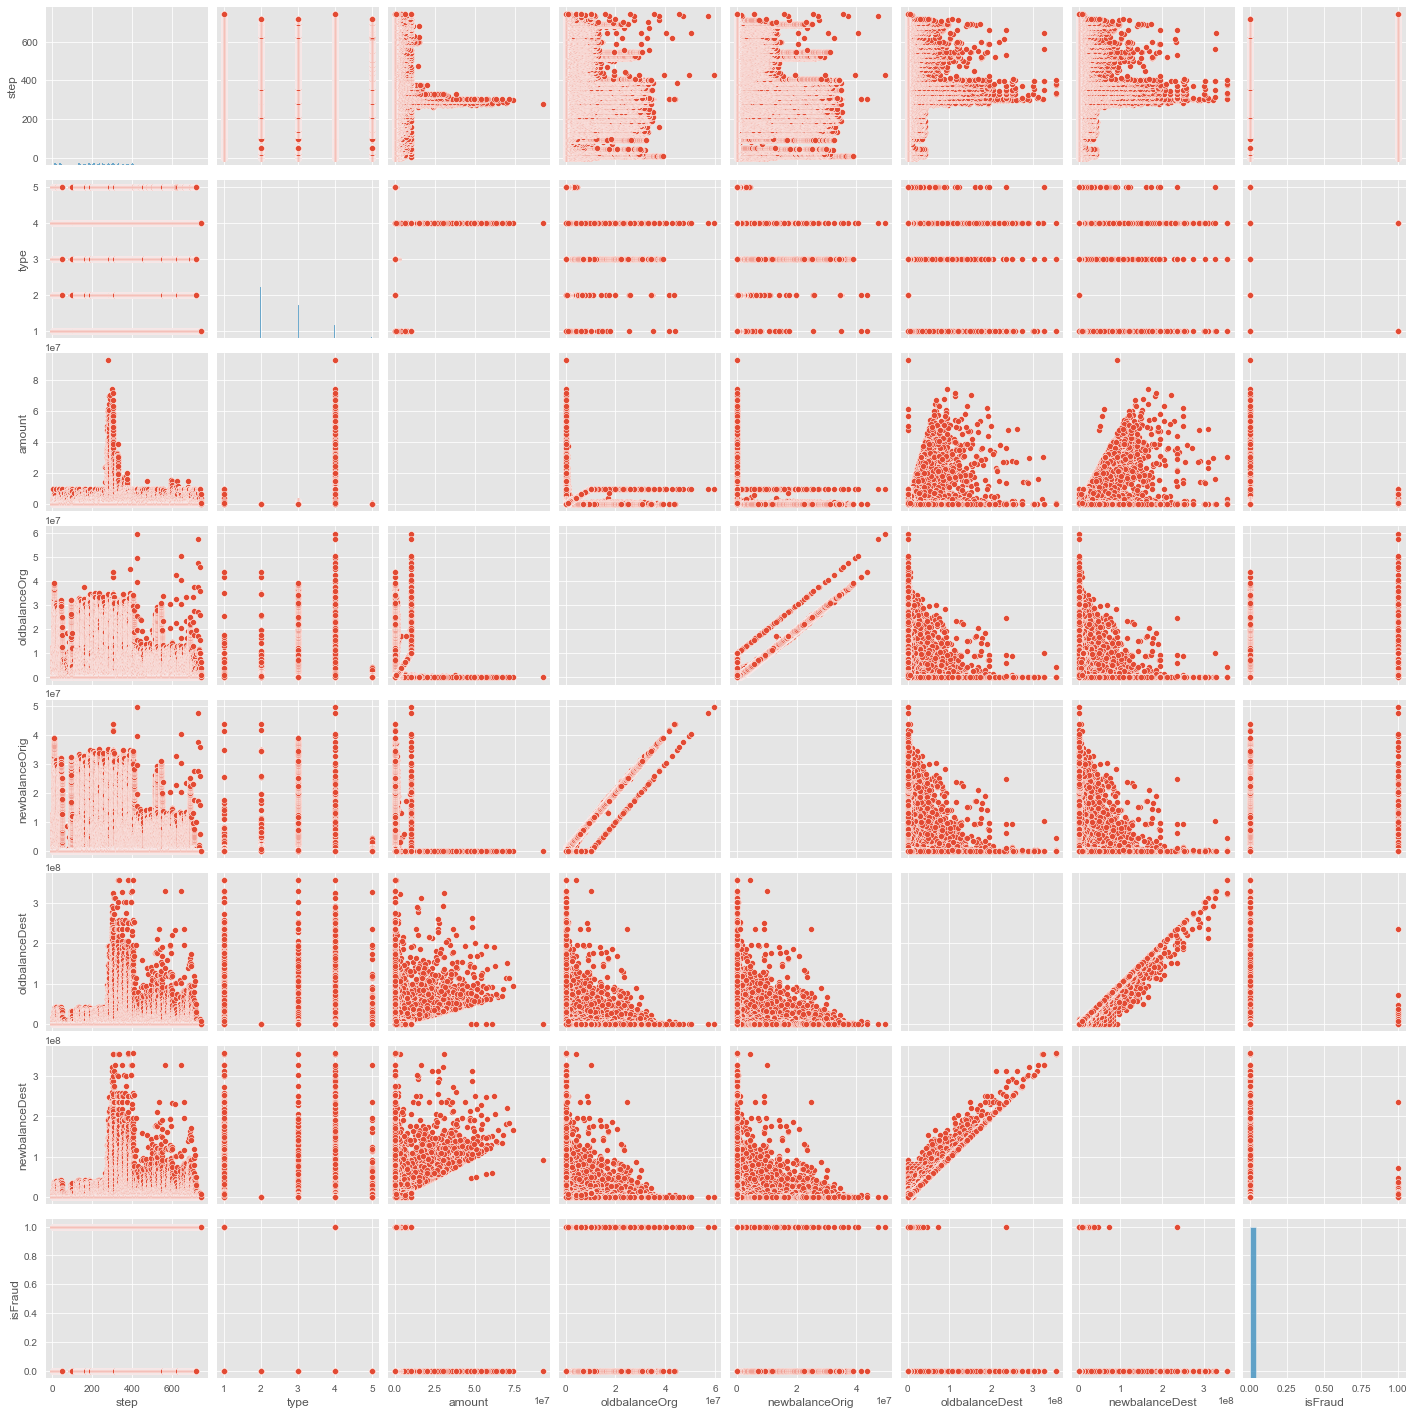

In [15]:
# Usando um plot para explorar a relação
sns.pairplot(df)

### Valores Ausentes (NA)

In [16]:
# Como não tem valores nulos nem ausentes, não é preciso fazer mais nada nesse passo.
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [17]:
# Retirando uma amostra para verificação
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
436922,18,2,2321.79,C341649665,229042.99,226721.20,M461406523,0.00,0.00,0
4186719,305,1,424271.95,C767594037,85493.00,0.00,C1611053041,2320887.96,2739205.85,0
349967,17,1,189351.87,C617125253,667360.41,478008.53,C1649787185,582095.86,771447.74,0
852067,41,1,53001.94,C1983495408,0.00,0.00,C1054012167,2539981.37,2592983.31,0
766235,39,1,18510.82,C1897939966,17705.00,0.00,C745901689,0.00,18510.82,0


### Valores Duplicados

In [18]:
# Verificando a existência de valores duplicados
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

In [19]:
# valores únicos
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
dtype: int64

## EDA

In [20]:
# Verificando a análise geral dos dados brutos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
type,6362620.0,2.055307e+00,9.808966e-01,1.0,1.00,2.000,3.000000e+00,5.000000e+00
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00


### Correlação

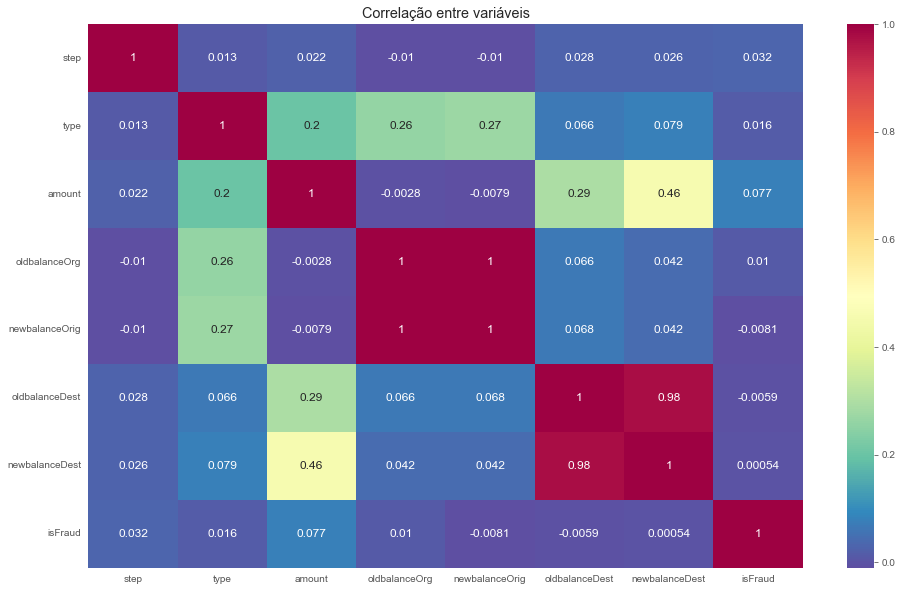

In [21]:
# Correlação 
plt.figure(figsize = (16,10))

corrmat = df.corr()
plt.title('Correlação entre variáveis')
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=False, 
                 annot_kws={'size': 12},  
                 cmap="Spectral_r")
plt.show()

Tirando algumas variáveis para analisar

<AxesSubplot:xlabel='newbalanceDest', ylabel='oldbalanceDest'>

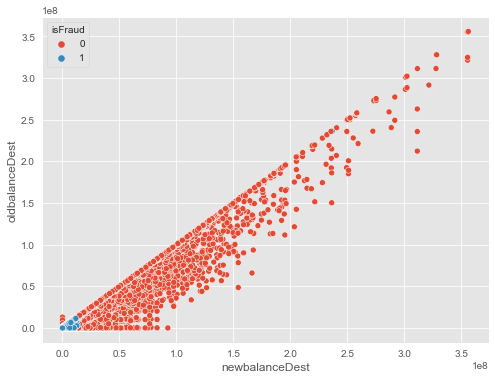

In [22]:
# comparando duas variáveis com a nossa target
plt.figure(figsize = (8,6))
sns.scatterplot(data = df, x='newbalanceDest', y='oldbalanceDest', hue='isFraud')

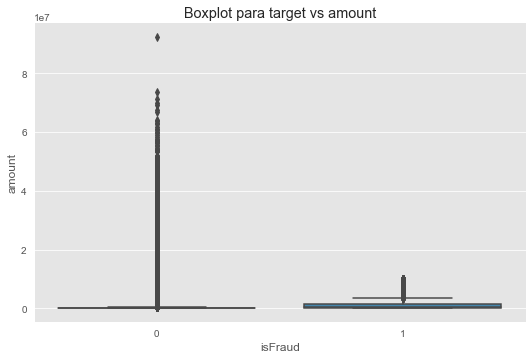

In [23]:

sns.catplot(x='isFraud', y='amount', data=df, kind="box", aspect=1.5)
plt.title('Boxplot para target vs amount')
plt.show()

In [40]:
df['amount'].describe().round()

count     6362620.0
mean       179862.0
std        603858.0
min             0.0
25%         13390.0
50%         74872.0
75%        208721.0
max      92445517.0
Name: amount, dtype: float64

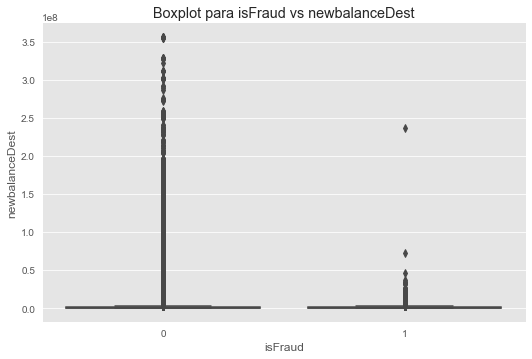

In [45]:
sns.catplot(x='isFraud', y='newbalanceDest', data=df, kind="box", aspect=1.5)
plt.title('Boxplot para isFraud vs newbalanceDest')
plt.show()

In [68]:
df['newbalanceDest'].describe().round(0)

count      6362620.0
mean       1224996.0
std        3674129.0
min              0.0
25%              0.0
50%         214661.0
75%        1111909.0
max      356179279.0
Name: newbalanceDest, dtype: float64

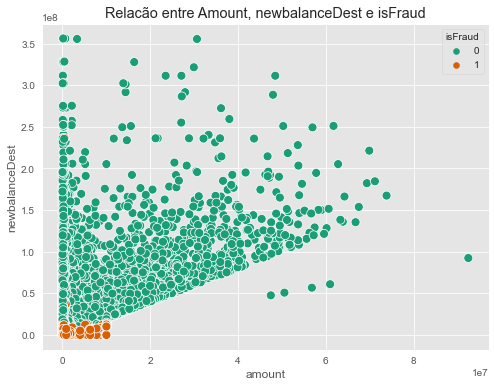

In [25]:
plt.figure(figsize = (8,6))
sns.scatterplot(x='amount', y='newbalanceDest', hue='isFraud', data=df, palette="Dark2", s=80)
plt.title('Relacão entre Amount, newbalanceDest e isFraud')
plt.show()

In [26]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


Top 20 de 'Step' que ocorreram fraudes

<AxesSubplot:title={'center':'Top 20 Step que ocorreram fraude'}, xlabel='step', ylabel='isFraud'>

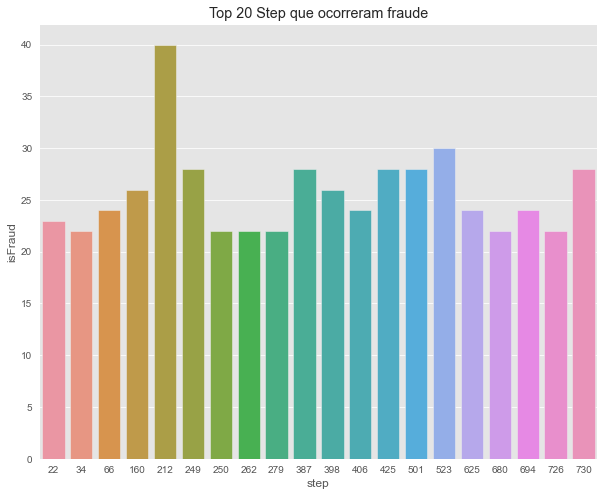

In [27]:
top = pd.DataFrame(df.groupby(by=df['step'])['isFraud'].sum())
top2 = top.sort_values(by='isFraud', ascending=False).head(20)
top2 = top2.rename_axis('step').reset_index()

plt.figure(figsize = (10, 8))
plt.title('Top 20 Step que ocorreram fraude')
sns.barplot(data=top2, x='step', y='isFraud')

Top 10 clientes mais ricos que tiverem as maiores perdas com a fraude

In [28]:
top10 = df.loc[df['isFraud'] == 1, ['nameOrig', 'oldbalanceOrg', 'newbalanceOrig']]

In [29]:
top10['lossfromFraud'] = top10['oldbalanceOrg'] - top10['newbalanceOrig']
top10 = top10.sort_values(by=['lossfromFraud', 'oldbalanceOrg'], ascending=False)
top10.head(10)

,nameOrig,oldbalanceOrg,newbalanceOrig,lossfromFraud
6266405,C794290057,42542664.27,32542664.27,10000000.0
6357390,C671111468,37418265.31,27418265.31,10000000.0
5563707,C1421664654,34892193.09,24892193.09,10000000.0
6010857,C1295280435,23752520.60,13752520.60,10000000.0
6168495,C292642955,23576297.10,13576297.10,10000000.0
6074073,C315155195,22625132.51,12625132.51,10000000.0
6014709,C524119157,19228514.10,9228514.10,10000000.0
5563723,C1074619527,19110884.44,9110884.44,10000000.0
5996399,C40489106,59585040.37,49585040.37,10000000.0
6362452,C726730575,57316255.05,47316255.05,10000000.0


In [30]:
top10['lossfromFraud'].value_counts().head(10)

10000000.00    262
0.00            57
10000000.00     12
10000000.00      5
1165187.89       4
429257.45        4
10000000.00      3
9960382.40       2
188441.76        2
188097.08        2
Name: lossfromFraud, dtype: int64

### Análise das Variáveis Númericas

In [9]:
# definir as variáveis numéricas (incluindo todos os valores 'int64' e os float)
numericas = df.select_dtypes(include=['int64', 'float'])

# definir as variáveis categoricas (excluindo todos os valores 'int64' e os float)
categoricas = df.select_dtypes(exclude=['int64', 'float'])

c:\Users\nascimentod\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nascimentod\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nascimentod\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

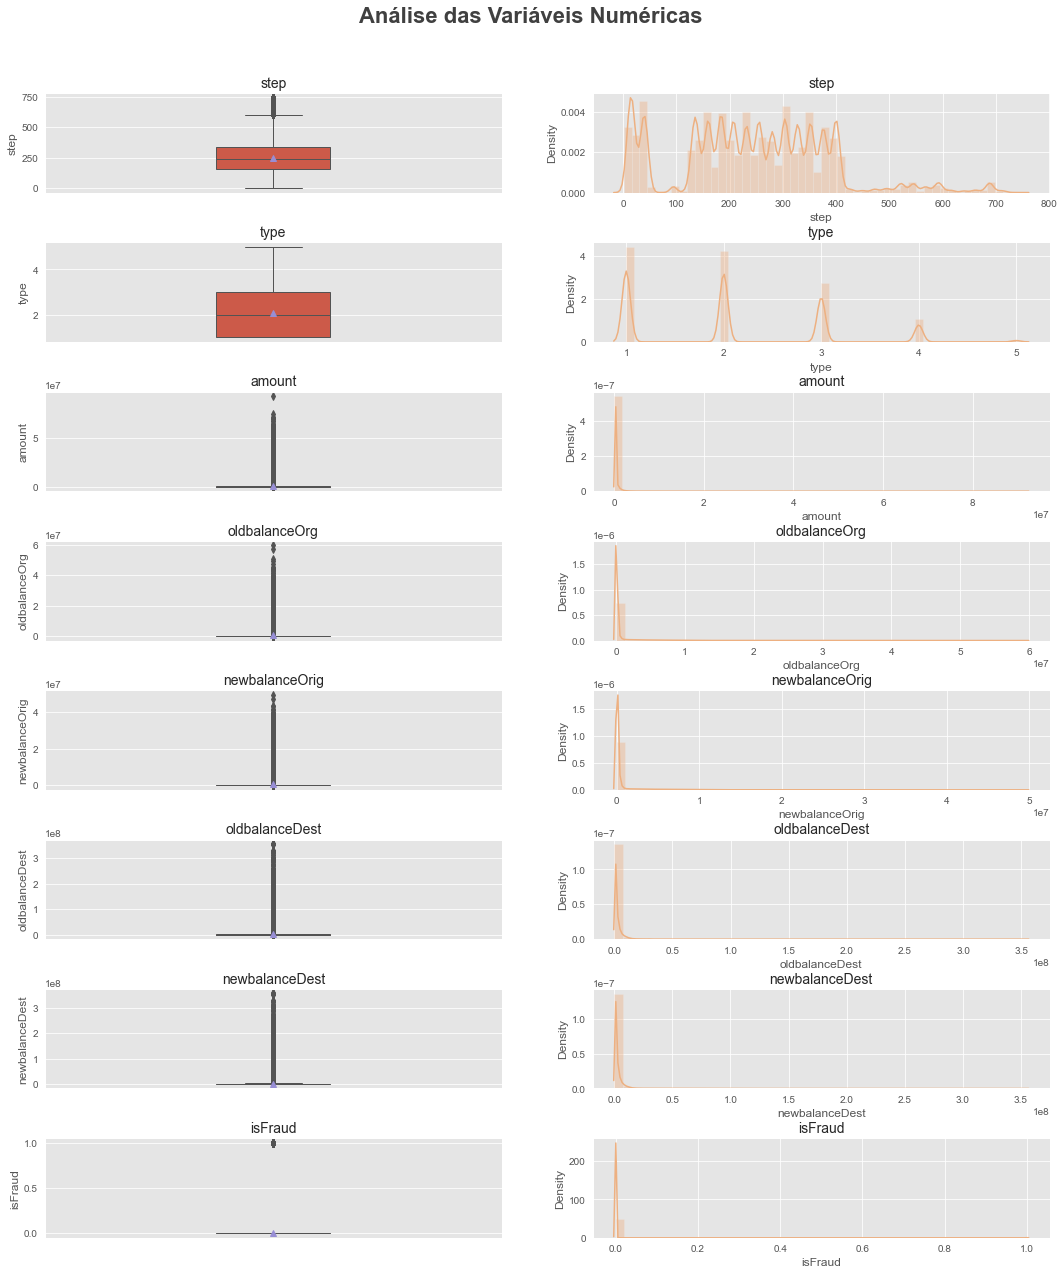

In [32]:
# ANÁLISE DAS VARIAVEIS NUMERICAS PLOTADAS

# Tamanho
Figura, Eixo = plt.subplots(figsize=(18, 20))

# Paleta de Cores
Paleta_Cores = sns.color_palette('flare', len(numericas) * 2)

# Titulo
plt.suptitle('Análise das Variáveis Numéricas', fontsize=22, color='#404040', fontweight=600)

# Estrutura
Linhas = 8 # (Todas as infos numericas)
Colunas = 2 #( Boxplot - Distplot)
Posicao = 1 # Posicao inicial do grid

# Loop para plotar os gráficos
for Coluna in numericas:

  # Plot no Grid -- Boxplot
  plt.subplot(Linhas, Colunas, Posicao)

  # Titulo dos boxplots
  plt.title(f'{Coluna}', loc='center', fontsize=14, fontweight=200)

  # Plot
  sns.boxplot(data=df, y=Coluna, showmeans=True, saturation=0.75, 
              linewidth=1, width=0.25)

  # Mudar
  Posicao += 1

  # Plot no Grid -- Distplot
  plt.subplot(Linhas, Colunas, Posicao)

  # Titulo dos displots
  plt.title( f'{Coluna}', loc='center', fontsize=14, fontweight=200)

  # Plot
  sns.distplot(df[Coluna], color=Paleta_Cores[Posicao - 1])

# Mudar
  Posicao += 1
    
# Ajuste de Grid
plt.subplots_adjust(top=0.92, hspace=0.5)

## Feature Engeneering

### Balanceando os dados

In [43]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


## Feature selection

In [48]:
labels = df['step','amount','nameOrig']

KeyError: ('step', 'amount', 'nameOrig')

In [57]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [64]:
X = df.drop(['isFraud','nameOrig','nameDest'], axis=1)
y = df.isFraud

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 999)

In [66]:
y = y_train.ravel()

In [67]:
rf = RandomForestClassifier(max_depth = 5, bootstrap = True)

In [68]:
feat_selector = BorutaPy(rf, n_estimators = 'auto', random_state = 999)

In [69]:
result_boruta = feat_selector.fit(X_train.values, y_train)

In [70]:
result_boruta

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=74,
                                          random_state=RandomState(MT19937) at 0x27F77140B40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x27F77140B40)

In [71]:
# Verificar as features selecionadas
accept = X_train.columns[feat_selector.support_].to_list()
irresolution = X_train.columns[feat_selector.support_weak_].to_list()

print("Selecionadas:")
print("************************")
print(list(accept))
print(list(irresolution))
print("************************")

Selecionadas:
************************
['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
[]
************************


In [72]:
result_boruta.support_

array([ True,  True,  True,  True,  True,  True,  True])

In [73]:
feature_ranks = list(zip(X_train.columns, 
                         result_boruta.ranking_, 
                         result_boruta.support_))

for feat in feature_ranks:
    if  feat[1] <= 6:
      print('Feature: {} Rank: {},  Manter: {}'.format(feat[0], 
                                                       feat[1], 
                                                       feat[2]))

Feature: step Rank: 1,  Manter: True
Feature: type Rank: 1,  Manter: True
Feature: amount Rank: 1,  Manter: True
Feature: oldbalanceOrg Rank: 1,  Manter: True
Feature: newbalanceOrig Rank: 1,  Manter: True
Feature: oldbalanceDest Rank: 1,  Manter: True
Feature: newbalanceDest Rank: 1,  Manter: True
